# Plotting with Matplotlib

***
## Line plots

<div class="alert alert-info">
<h3> Your turn</h3>
Use the data files located in the folder <TT>../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the data in <TT>REALRATE.csv</TT> and <TT>FEDFUNDS.csv</TT> into two different DataFrames.
        The files contain monthly real 1-year interest rates and the Federal Funds rate, respectively.
        <br/>
        <i>Hint:</i> Use <TT>pd.read_csv(..., parse_dates=['DATE'], index_col='DATE')</TT> to automatically parse strings stored in the <TT>DATE</TT> column as dates and set <TT>DATE</TT> as the index.
        </li>
    <li>Plot the <TT>REALRATE</TT> using a blue dashed line with line width 0.5 and <TT>FEDFUNDS</TT> using an orange line with line width 0.75 in the <i>same</i> figure.</li>
</ol>
</div>

### Solution

#### Part (1)

In [1]:
# Path to local data folder
DATA_PATH = '../data/FRED'
DATA_PATH = '/home/richard/repos/teaching/TECH2-H24/data/FRED'

import pandas as pd

# Load both time series
realrate = pd.read_csv(f'{DATA_PATH}/REALRATE.csv', parse_dates=['DATE'], index_col='DATE')
fedfunds = pd.read_csv(f'{DATA_PATH}/FEDFUNDS.csv', parse_dates=['DATE'], index_col='DATE')

#### Part (2)

If you set the index accordingly, Matplotlib automatically displays the date on the $x$-axis without having to specify the $x$-values explicitly.

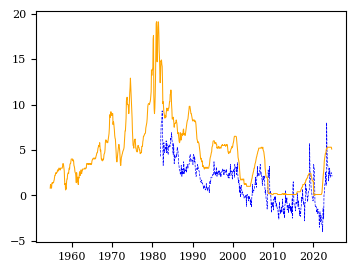

In [2]:
import matplotlib.pyplot as plt

# Plot real rate with as a dashed line with width 0.5
plt.plot(realrate, c='blue', ls='--', lw=0.5)

# Plot the Fed Funds rate as a solid orange line with width 0.75
plt.plot(fedfunds, c='orange', lw=0.75)


We could alternatively use the dates as $x$-values. For that, we first need to move them back to columns:

In [3]:
# Move date to columns
realrate = realrate.reset_index(drop=False)
fedfunds = fedfunds.reset_index(drop=False)

We can now plot both time series, specifying both the $x$- and $y$-values:

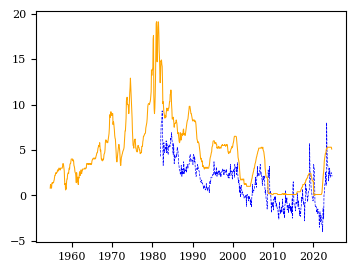

In [4]:
# Plot real rate, explicitly specifying date
plt.plot(realrate['DATE'], realrate['REALRATE'], c='blue', ls='--', lw=0.5)

# Plot the Fed Funds rate as a solid orange line with width 0.75
plt.plot(fedfunds['DATE'], fedfunds['FEDFUNDS'], c='orange', lw=0.75)

***
## Scatter plots

<div class="alert alert-info">
<h3> Your turn</h3>
Use the data files located in the folder <TT>../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the data in <TT>REALRATE.csv</TT> and <TT>FEDFUNDS.csv</TT> into two different DataFrames.
        The files contain monthly real 1-year interest rates and the Federal Funds rate, respectively.
        <br/>
        <i>Hint:</i> Use <TT>pd.read_csv(..., parse_dates=['DATE'], index_col='DATE')</TT> to automatically parse strings stored in the <TT>DATE</TT> column as dates and set <TT>DATE</TT> as the index.
        </li>
    <li>Create a scatter plot of <TT>REALRATE</TT> (on the y-axis) against <TT>FEDFUNDS</TT> (on the x-axis).
    Specify the arguments <TT>edgecolors='blue'</TT> and <TT>color='none'</TT> to plot the data as blue rings.
    <br/>
    <i>Hint:</i> <TT>scatter()</TT> requires the arguments to be of equal length, which is not the case here.
    Restrict the data to the same time period, for example by using <TT>join(..., how='inner')</TT>.
    </li>
</ol>
</div>

### Solution

### Part (1)

In [5]:
# Path to local data folder
DATA_PATH = '../data/FRED'
DATA_PATH = '/home/richard/repos/teaching/TECH2-H24/data/FRED'

import pandas as pd

# Load both time series
realrate = pd.read_csv(f'{DATA_PATH}/REALRATE.csv', parse_dates=['DATE'], index_col='DATE')
fedfunds = pd.read_csv(f'{DATA_PATH}/FEDFUNDS.csv', parse_dates=['DATE'], index_col='DATE')

#### Part (2)

Trying to create the scatter plot on the original data results in the following error:

ValueError: x and y must be the same size

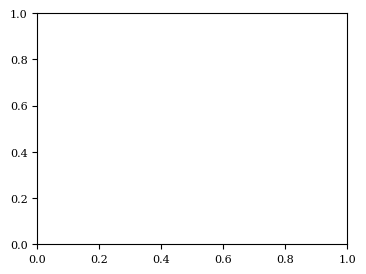

In [6]:
import matplotlib.pyplot as plt

plt.scatter(realrate, fedfunds, edgecolors='blue', color='none')

This error arises because these variables are observed for different time periods. One way to rectify this is to merge them into a single `DataFrame` using `join(..., how='inner')` which only keeps periods for which both variables are observed.

In [8]:
# Perform inner join to keep only intersection of dates
df = realrate.join(fedfunds, how='inner')

Once we have harmonized the number of observations, we can create the scatter plot as follows:

Text(0, 0.5, 'Real interest rate')

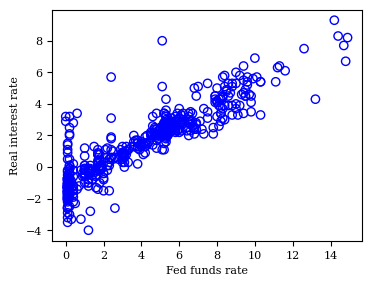

In [9]:
plt.scatter(df['FEDFUNDS'], df['REALRATE'], edgecolors='blue', color='none')
plt.xlabel('Fed funds rate')
plt.ylabel('Real interest rate')

***
# Working with multiple plots (axes)

<div class="alert alert-info">
<h3> Your turn</h3>
Create a figure with 3 columns (on a single row) and plot the following functions
on the interval [0, 6]:
<ol>
    <li>Subplot 1: y = sin(x)</li>
    <li>Subplot 2: y = sin(2*x)</li>
    <li>Subplot 3: y = sin(4*x)</li>
</ol>

<i>Hint:</i> The sine function can be imported from NumPy as <TT>np.sin()</T>.
</div>

### Solution

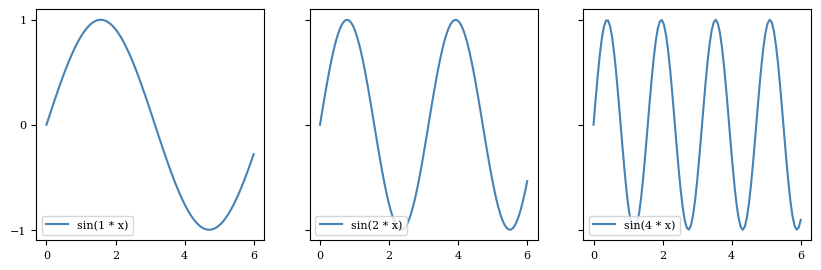

In [10]:
import matplotlib.pyplot as plt 
import numpy as np

# Create a figure with 3 subplots arranged in 3 columns
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 3))

# Define common x-values for all subplots
xvalues = np.linspace(0, 6, 101)

# Iterate through axes
for i, ax in enumerate(axes):
    # Create plot-specific y-values
    yvalues = np.sin(2**i * xvalues)
    ax.plot(xvalues, yvalues, color='steelblue', lw=1.5, label=f'sin({2**i} * x)')
    ax.set_yticks([-1, 0, 1])

    # Place legend in lower left corner
    ax.legend(loc='lower left')

****
# Plotting with pandas

<div class="alert alert-info">
<h3> Your turn</h3>
Use the data files located in the folder <TT>../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the macroeconomic time series data from <TT>FRED_monthly_all.csv</TT>.
        <br/>
        <i>Hint:</i> Use <TT>pd.read_csv(..., parse_dates=['DATE'])</TT> to automatically set parse strings as dates.
        </li>
    <li>Create a line plot, showing both the unemployment rate <TT>UNRATE</TT>
        and the inflation rate <TT>INFLATION</TT> in a single graph.
    </li>
</ol>
</div>

### Solution

#### Part (1)

In [11]:
# Path to local data/ folder
DATA_PATH = '../data/FRED'
DATA_PATH = '/home/richard/repos/teaching/TECH2-H24/data/FRED'

# Path to FRED.csv; 
filepath = f'{DATA_PATH}/FRED_monthly_all.csv'

# Read CSV data
df = pd.read_csv(filepath, parse_dates=['DATE'])

#### Part (2)

<Axes: xlabel='DATE', ylabel='Percent'>

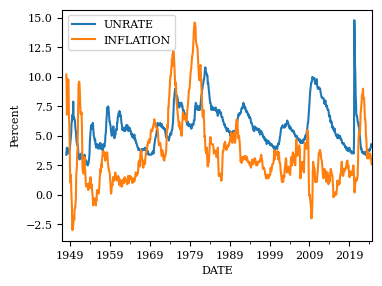

In [12]:
# Plot unemployment rate and inflation
df.plot(x='DATE', y=['UNRATE', 'INFLATION'], ylabel='Percent')